Preprocessing Phase of Capstone 2
Project: Cluster Analysis of Tech Companies by Education Attainment

Action Steps: 

Data Cleaning: We saw in the EDA phase that decimal places in our Education Data for several years (2011-20014) needs to be restored. There are also several missing values and some of our columns are redundant and can confuse our analysis. We will handle missing values, inconsistent data, and duplicates.

Feature Engineering:
We sill selected relevant features related to education and business data seperately and then remerge education and business datasets.

Data Scaling:
We will standardized features to ensure they have a mean of 0 and a standard deviation of 1.

Correlation Analysis:
We will analyze the correlation matrix to identify multicollinearity among features.

Data Visualization:
We will visualize feature distributions and the explained variance by PCA components.

Dimensionality Reduction:
We will perform PCA (Principal Component Analysis) to reduce the dimensionality of the data while retaining most of the variance.

In [83]:
import pandas as pd

# Load the data with specified dtype for ZipCode and NAICS columns
file_path = '/Users/admin/Desktop/final_filtered_business_education_data.csv'
data = pd.read_csv(file_path, dtype={'ZipCode': str, 'NAICS': str})

# Define the columns of interest
columns_of_interest = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 
    'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 
    'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
    'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 
    'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Filter data to only keep the necessary columns
education_columns = columns_of_interest + ['ZipCode', 'Year']
business_columns = [
    'BUSINESS NAME', 'ZIP CODE', 'NAICS', 'LOCATION START DATE',
    'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION'
]
data = data[business_columns + education_columns]

# Correct the decimal point for the specified years and columns by multiplying by 100
years_to_correct = [2011, 2012, 2013, 2014]
for year in years_to_correct:
    mask = data['Year'] == year
    data.loc[mask, columns_of_interest] *= 100

# Ensure no duplicate columns and consistent column types
data = data.loc[:, ~data.columns.duplicated()]

# Save the final data
final_file_path = '/Users/admin/Desktop/final_filtered_business_education_data_corrected.csv'
data.to_csv(final_file_path, index=False)

# Display summary statistics to confirm changes
summary = data.groupby('Year').sum(numeric_only=True)
print(summary)

# Output the first few rows of the final merged data
print(data.head())


      LOCATION END DATE  Pop 18-24 Some College  Pop 18-24 Bachelors+  \
Year                                                                    
2011                0.0               2236990.0             1056360.0   
2012                0.0               2341890.0             1121860.0   
2013                0.0               2721120.0             1270790.0   
2014                0.0               3500570.0             1749460.0   
2015                0.0               1580556.0              617906.0   
2016                0.0               1671432.0              602824.0   
2017                0.0               1554794.0              580437.0   
2018                0.0               1879730.0              644453.0   
2019                0.0               1544163.0              567454.0   
2020                0.0               1088170.0              427783.0   
2021                0.0                980632.0              371778.0   
2022                0.0                851374.0    

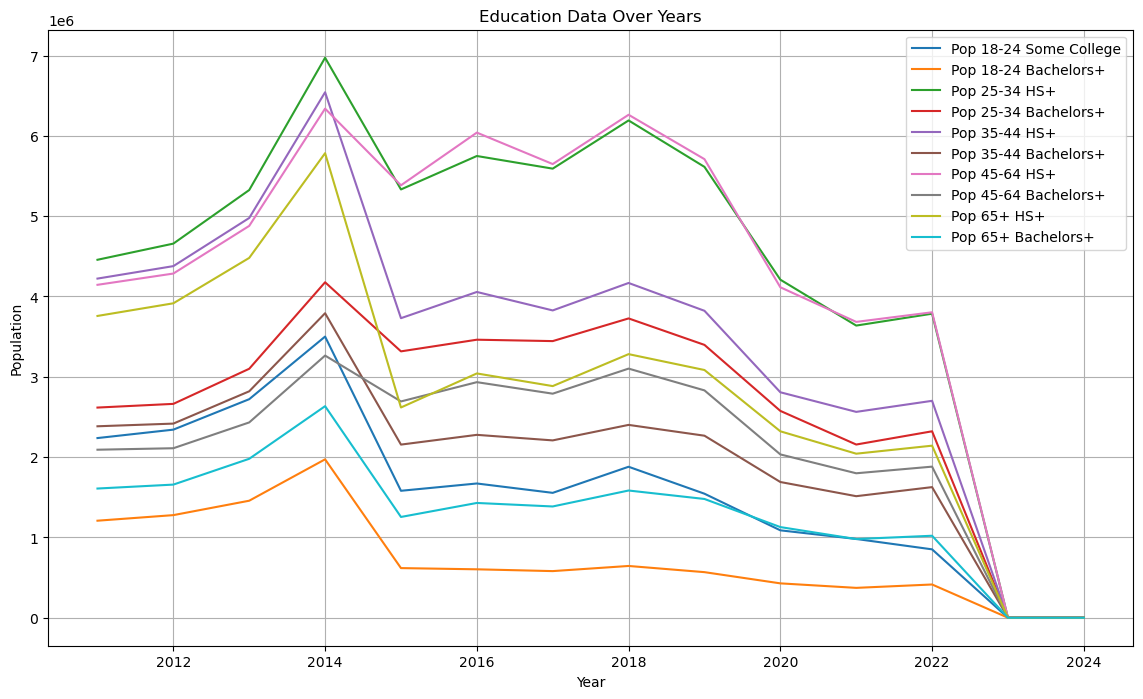

In [84]:
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 
    'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 
    'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
    'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 
    'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Group data by Year and sum the columns to be plotted
grouped_data = education_data.groupby('Year')[columns_to_plot].sum()

# Plotting
plt.figure(figsize=(14, 8))

for column in columns_to_plot:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Education Data Over Years')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
print(business_data.columns)

Index(['BUSINESS NAME', 'ZIP CODE', 'NAICS', 'LOCATION START DATE',
       'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION', 'ZipCode',
       'Year'],
      dtype='object')


In [88]:
# Ensure the NAICS column is in string format
business_data['NAICS'] = business_data['NAICS'].astype(str)

# Merge education data with business data on 'ZipCode' and 'Year'
merged_data = pd.merge(education_data, business_data[['ZipCode', 'NAICS', 'Year']], on=['ZipCode', 'Year'], how='left')

# Verify the merge
print(merged_data.head())

   Year ZipCode  Pop 18-24 Some College  Pop 18-24 Bachelors+  \
0  2020   91040                     0.0                   0.0   
1  2020   91040                     0.0                   0.0   
2  2020   91040                     0.0                   0.0   
3  2020   91040                     0.0                   0.0   
4  2020   91040                     0.0                   0.0   

   Pop 25+ Bachelors+  Pop 25-34 HS+  Pop 25-34 Bachelors+  Pop 35-44 HS+  \
0                 0.0            0.0                   0.0            0.0   
1                 0.0            0.0                   0.0            0.0   
2                 0.0            0.0                   0.0            0.0   
3                 0.0            0.0                   0.0            0.0   
4                 0.0            0.0                   0.0            0.0   

   Pop 35-44 Bachelors+  Pop 45-64 HS+  Pop 45-64 Bachelors+  Pop 65+ HS+  \
0                   0.0            0.0                   0.0         

In [89]:
# Convert NAICS to string and remove trailing .0
merged_data['NAICS'] = merged_data['NAICS'].astype(str).str.replace('\.0$', '', regex=True)

# Verify the changes
print(merged_data.head())

   Year ZipCode  Pop 18-24 Some College  Pop 18-24 Bachelors+  \
0  2020   91040                     0.0                   0.0   
1  2020   91040                     0.0                   0.0   
2  2020   91040                     0.0                   0.0   
3  2020   91040                     0.0                   0.0   
4  2020   91040                     0.0                   0.0   

   Pop 25+ Bachelors+  Pop 25-34 HS+  Pop 25-34 Bachelors+  Pop 35-44 HS+  \
0                 0.0            0.0                   0.0            0.0   
1                 0.0            0.0                   0.0            0.0   
2                 0.0            0.0                   0.0            0.0   
3                 0.0            0.0                   0.0            0.0   
4                 0.0            0.0                   0.0            0.0   

   Pop 35-44 Bachelors+  Pop 45-64 HS+  Pop 45-64 Bachelors+  Pop 65+ HS+  \
0                   0.0            0.0                   0.0         

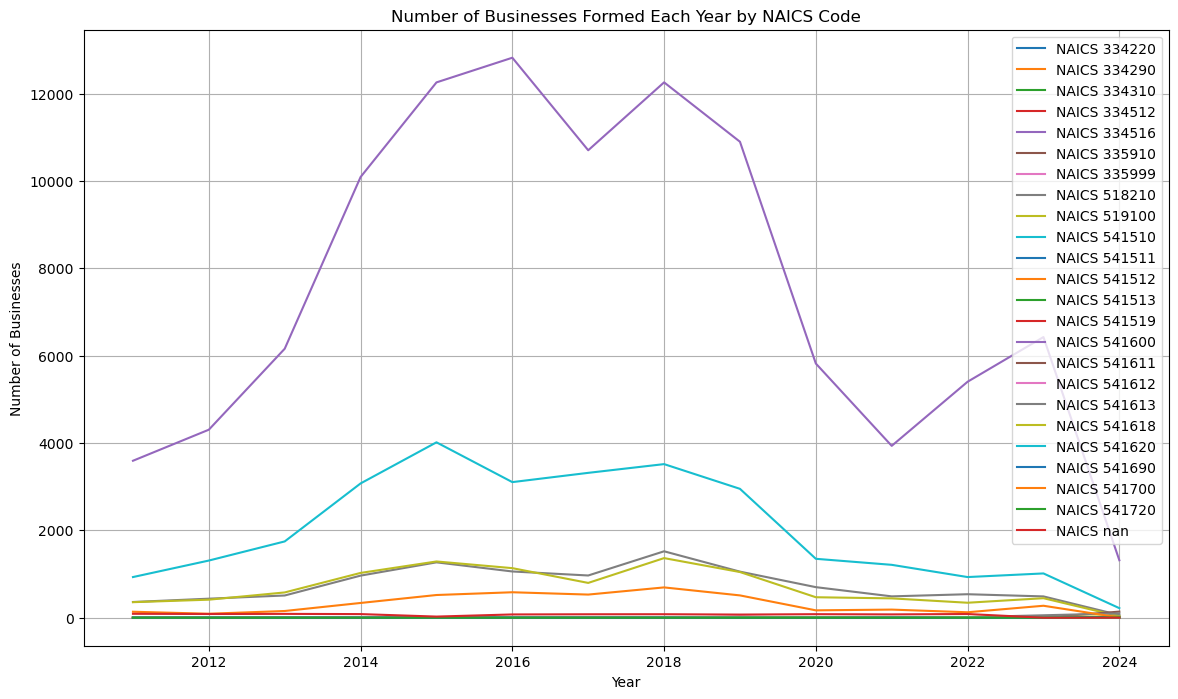

In [90]:
# Count the number of businesses formed each year for each NAICS code
naics_counts = merged_data.groupby(['Year', 'NAICS']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))

for naics_code in naics_counts.columns:
    plt.plot(naics_counts.index, naics_counts[naics_code], label=f'NAICS {naics_code}')

plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.title('Number of Businesses Formed Each Year by NAICS Code')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

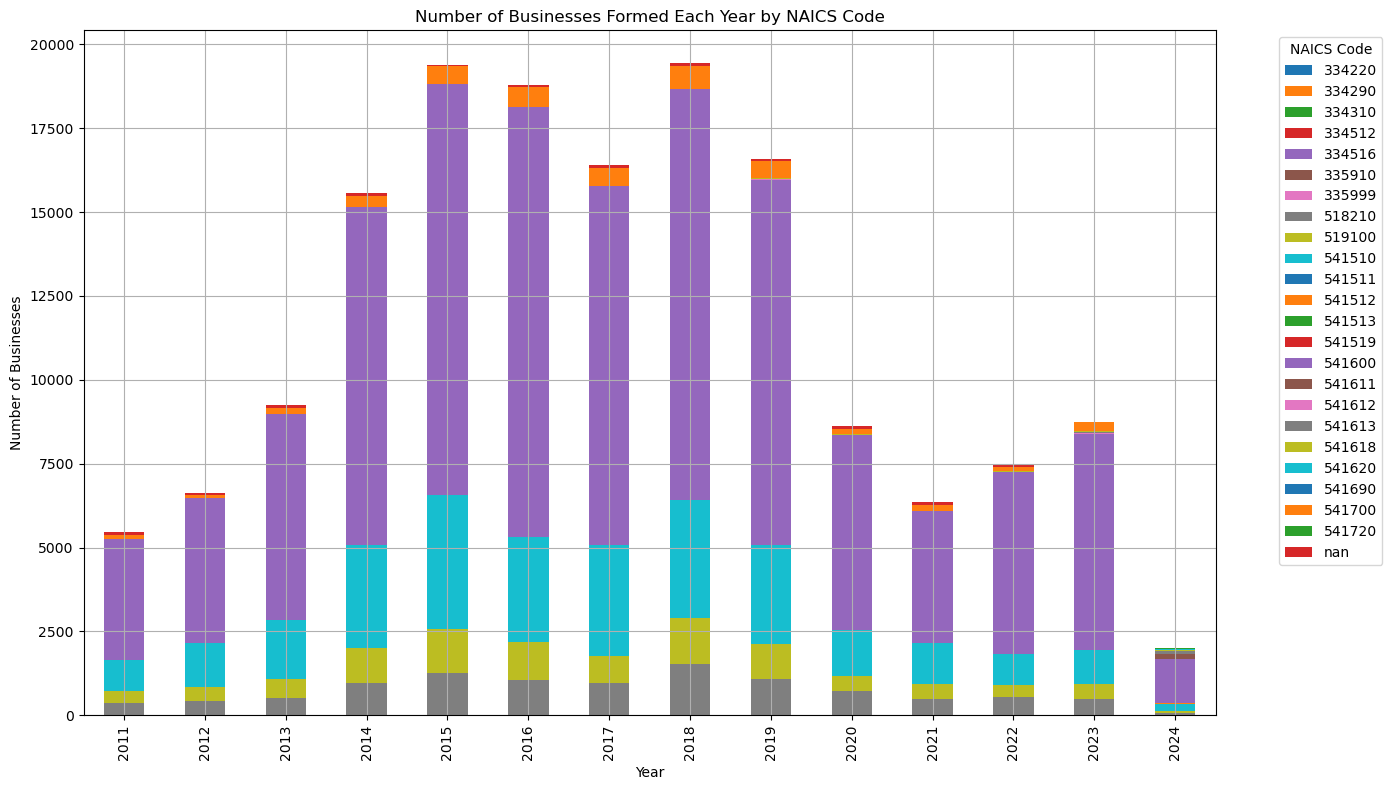

In [91]:
# Count the number of businesses formed each year for each NAICS code
naics_counts = merged_data.groupby(['Year', 'NAICS']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))

naics_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.title('Number of Businesses Formed Each Year by NAICS Code')
plt.legend(title='NAICS Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

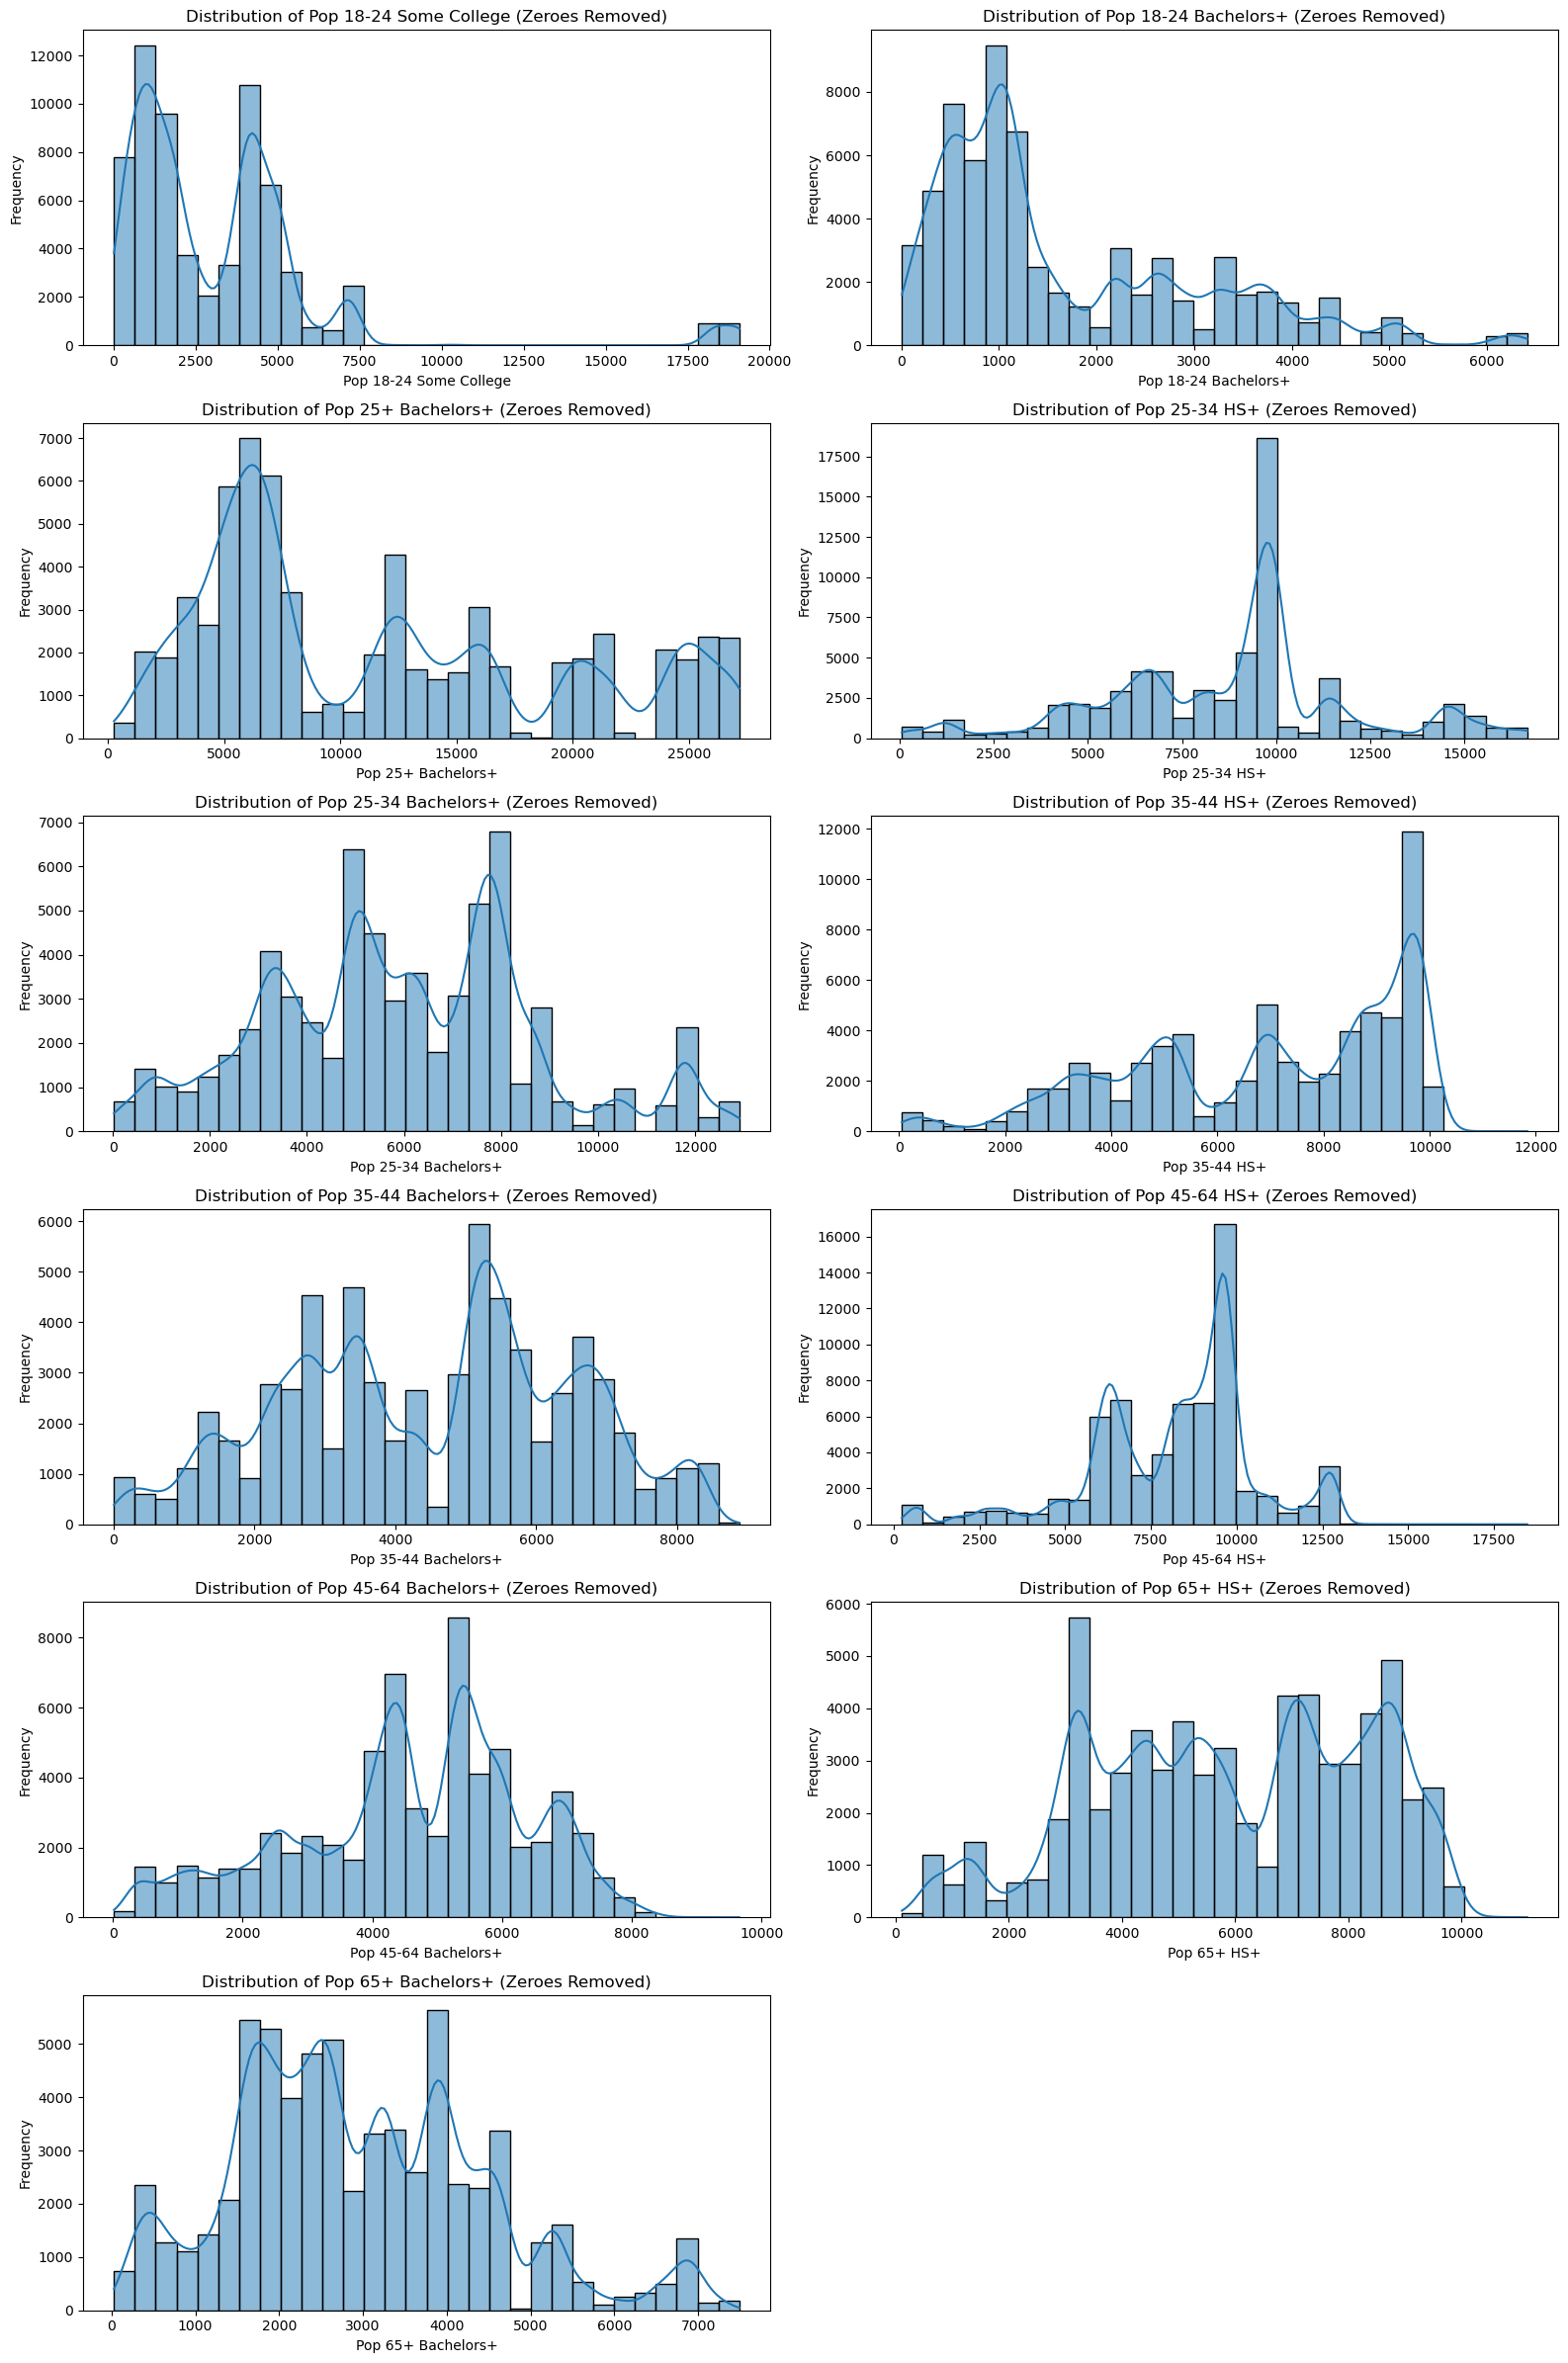

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows with zero values in any of the feature columns
filtered_data = merged_data[(merged_data[feature_columns] != 0).all(axis=1)]

# Plotting histograms for filtered data
plt.figure(figsize=(16, 24))
for i, column in enumerate(feature_columns, 1):
    plt.subplot(len(feature_columns) // 2 + 1, 2, i)
    sns.histplot(filtered_data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column} (Zeroes Removed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Interpretation
Zero Values Removed: The histograms now exclude zero values, providing a clearer view of the non-zero data points. This can help in understanding the actual distribution of the population that has attained different education levels.

Skewness: Many of the distributions are right-skewed (positive skew), meaning that most data points are clustered at the lower end with a long tail extending to the right. This is common in many datasets where a few individuals or areas have significantly higher values than the rest.

Peaks: Some histograms show distinct peaks, indicating common values or ranges in the dataset. For example, the "Pop 25-34 HS+" category has a noticeable peak around the 10,000 mark.

Outliers: The presence of outliers can be observed, especially in categories where a few records have exceptionally high values compared to the rest.

In [95]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = log_transformed_data.copy()
scaled_data[feature_columns] = scaler.fit_transform(scaled_data[feature_columns])

# Check the scaled data
print(scaled_data[feature_columns].describe())

       Pop 18-24 Some College  Pop 18-24 Bachelors+  Pop 25+ Bachelors+  \
count            1.607060e+05          1.607060e+05        1.607060e+05   
mean             1.273358e-16         -1.301655e-16       -3.027763e-16   
std              1.000003e+00          1.000003e+00        1.000003e+00   
min             -1.279934e+00         -1.442376e+00       -9.016604e-01   
25%             -1.279934e+00         -1.442376e+00       -9.016604e-01   
50%              5.485176e-01          5.200173e-01       -9.016604e-01   
75%              8.186288e-01          7.315886e-01        1.051415e+00   
max              1.381250e+00          1.335272e+00        1.362008e+00   

       Pop 25-34 HS+  Pop 25-34 Bachelors+  Pop 35-44 HS+  \
count   1.607060e+05          1.607060e+05   1.607060e+05   
mean   -4.810464e-16         -3.621997e-16  -1.301655e-16   
std     1.000003e+00          1.000003e+00   1.000003e+00   
min    -1.318017e+00         -1.313818e+00  -1.318162e+00   
25%    -1.318017e+0

Feature scaling has standardized the data effectively, with a mean close to zero and a standard deviation of one for all the features. This is a good sign that the features have been properly scaled.

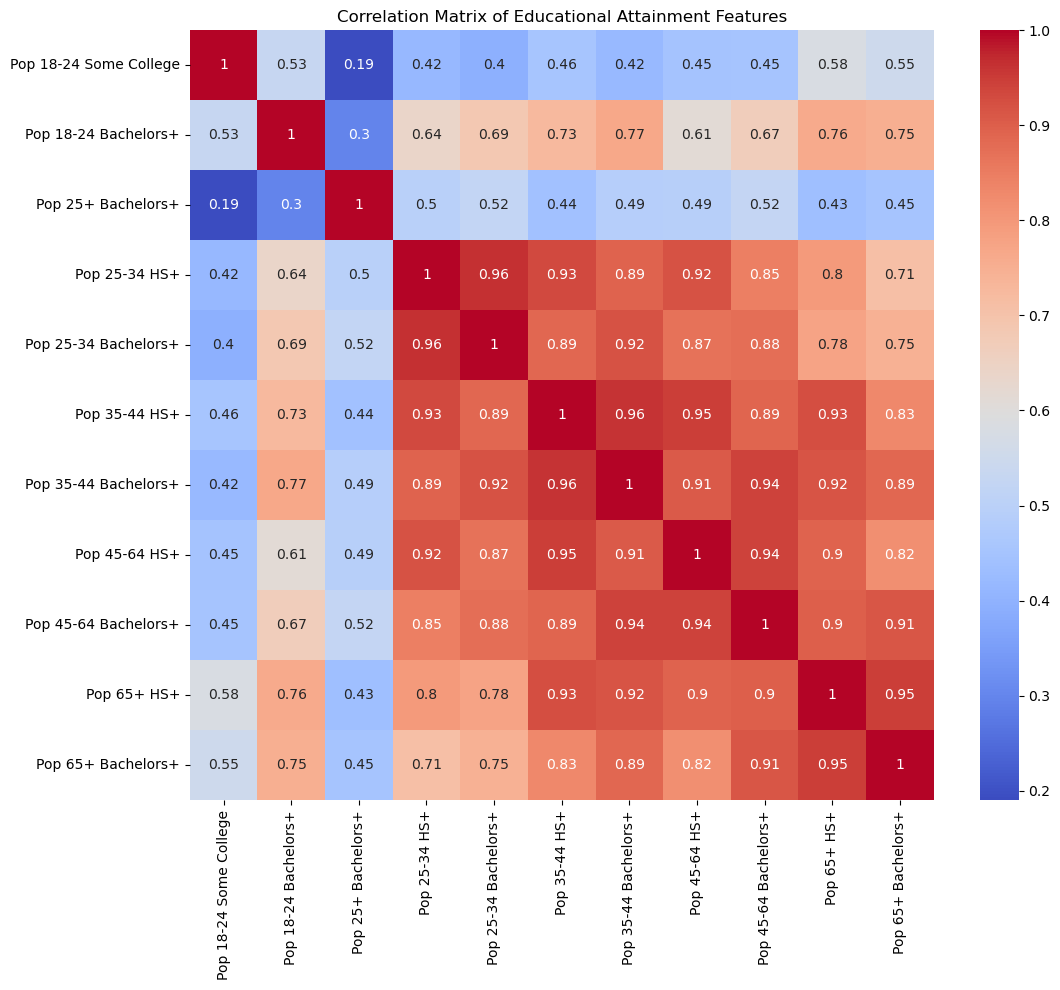

In [97]:
# Compute the correlation matrix
correlation_matrix = merged_data[feature_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Educational Attainment Features')
plt.show()

The correlation matrix heatmap provides insight into how the different educational attainment features are related to each other. 
Strong Positive Correlation:
Within similar age groups:
Pop 25-34 HS+ and Pop 25-34 Bachelors+ have a very high correlation (0.96).
Pop 35-44 HS+ and Pop 35-44 Bachelors+ also show a strong correlation (0.96).
Pop 45-64 HS+ and Pop 45-64 Bachelors+ (0.94).
Pop 65+ HS+ and Pop 65+ Bachelors+ (0.95).


Cross-Age Group Correlations:
There are also strong correlations between educational attainments across different age groups. 
For example:
Pop 25-34 Bachelors+ and Pop 35-44 HS+ have a correlation of 0.89.
Pop 35-44 HS+ and Pop 45-64 Bachelors+ have a correlation of 0.89.
Weaker Correlations:

Some correlations are weaker, indicating less direct relationship between those educational attainments. For example:
Pop 18-24 Some College and Pop 25+ Bachelors+ have a correlation of 0.19.
Pop 18-24 Bachelors+ and Pop 25+ Bachelors+ have a correlation of 0.30.
Implications:

Feature Redundancy:
The high correlations within age groups suggest that there might be some redundancy. For example, Pop 25-34 HS+ and Pop 25-34 Bachelors+ are very similar in their information, as indicated by the high correlation. This means you might not need to include both in a predictive model.
Potential Feature Reduction:

Given the high correlations, you might consider dimensionality reduction techniques like PCA (Principal Component Analysis) to combine these correlated features into a single component that captures most of the variance.

Predictive Power:
Features with strong correlations to many other features might be more influential in a predictive model. Features like Pop 35-44 HS+, Pop 45-64 HS+, and Pop 65+ HS+ show strong correlations with many other features, suggesting they could be significant predictors.

Number of components to retain to explain 95% variance: 5


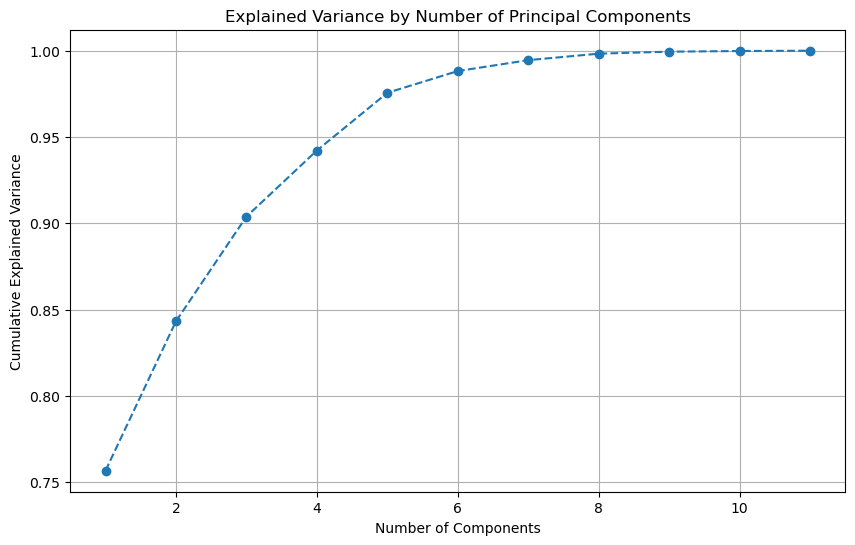

Explained Variance by Principal Component:
     Explained Variance
PC1            0.756692
PC2            0.086590
PC3            0.060608
PC4            0.038308
PC5            0.033418
Data with Principal Components:
   Year ZipCode  Pop 18-24 Some College  Pop 18-24 Bachelors+  \
0  2020   91040                     0.0                   0.0   
1  2020   91040                     0.0                   0.0   
2  2020   91040                     0.0                   0.0   
3  2020   91040                     0.0                   0.0   
4  2020   91040                     0.0                   0.0   

   Pop 25+ Bachelors+  Pop 25-34 HS+  Pop 25-34 Bachelors+  Pop 35-44 HS+  \
0                 0.0            0.0                   0.0            0.0   
1                 0.0            0.0                   0.0            0.0   
2                 0.0            0.0                   0.0            0.0   
3                 0.0            0.0                   0.0            0.0   
4    

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the feature columns
feature_columns = ['Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 'Pop 25+ Bachelors+', 
                   'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
                   'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+', 'Pop 65+ Bachelors+']

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(merged_data[feature_columns])

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_data)

# Determine the number of components to retain (e.g., explaining 95% of the variance)
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
components_to_retain = next(i for i, total_variance in enumerate(explained_variance_ratio) if total_variance >= 0.95) + 1

print(f"Number of components to retain to explain 95% variance: {components_to_retain}")

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

# Apply PCA with the selected number of components
pca = PCA(n_components=components_to_retain)
principal_components = pca.fit_transform(standardized_data)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(components_to_retain)])

# Display the explained variance ratio
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance'])
explained_variance.index = [f'PC{i+1}' for i in range(components_to_retain)]
print("Explained Variance by Principal Component:")
print(explained_variance)

# Add the principal components to the original data
merged_data_with_pca = pd.concat([merged_data.reset_index(drop=True), principal_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the new DataFrame with principal components
print("Data with Principal Components:")
print(merged_data_with_pca.head())

Explained Variance Plot:
The plot shows the cumulative explained variance as a function of the number of principal components.
The first principal component (PC1) explains about 75.66% of the variance in the data.
The second principal component (PC2) adds another 8.65%, bringing the total to around 84.21%.
By the time we include the fifth principal component (PC5), we have captured about 97.43% of the variance.
This indicates that the first few principal components capture most of the variability in the data, and we can reduce the dimensionality of our dataset from 11 original features to about 5 principal components while retaining most of the information.

Explained Variance by Principal Component:
The table lists the explained variance for each principal component.
PC1 has the highest explained variance (0.756692), followed by PC2 (0.086590), and so on.
This reinforces the idea that the first few components capture the bulk of the information in your data.
Principal Components Data:

The principal components (PC1, PC2, PC3, PC4, PC5) are listed alongside the original columns for the first few rows of your dataset.
This transformed data can be used for further analysis, clustering, or modeling.

In [106]:
# Assuming merged_data_with_pca is your final DataFrame after PCA
merged_data_with_pca.to_csv('/Users/admin/Desktop/processed_data_with_pca.csv', index=False)
print("Preprocessed data has been saved as 'processed_data_with_pca.csv'.")

Preprocessed data has been saved as 'processed_data_with_pca.csv'.


We now remove the original educational features after performing PCA is to reduce redundancy and dimensionality in our dataset. PCA creates new features (principal components) that are linear combinations of the original features, capturing most of the variance with fewer components. By removing the original features, we ensure that our dataset is not overfitted or overwhelmed by highly correlated features.

In [110]:
# Load the processed data
data_with_pca = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv')

# Display the column names
print(data_with_pca.columns)

Index(['Year', 'ZipCode', 'NAICS', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object')


/var/folders/0t/d3pxkghn5d920blj72_db9mr0000gn/T/ipykernel_4201/637770199.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_with_pca = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv')


In [111]:
from sklearn.model_selection import train_test_split

# Load the preprocessed data with PCA components
data_with_pca = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv', dtype={'ZipCode': str})

# Features and target variable (you might need to define your target variable)
# Assuming the target variable is 'NAICS' for this example
X = data_with_pca.drop(columns=['NAICS'])
y = data_with_pca['NAICS']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the splits to CSV files for future use
X_train.to_csv('/Users/admin/Desktop/X_train.csv', index=False)
X_test.to_csv('/Users/admin/Desktop/X_test.csv', index=False)
y_train.to_csv('/Users/admin/Desktop/y_train.csv', index=False)
y_test.to_csv('/Users/admin/Desktop/y_test.csv', index=False)

# Display confirmation messages
print("Data has been split into training and test sets and saved to CSV files.")

Data has been split into training and test sets and saved to CSV files.


Summary of Steps Taken:

Data Cleaning and Preprocessing:
Cleaned and transformed dataset.
Applied log transformation and standardization.
Conducted feature engineering, including PCA for dimensionality reduction.
Visualized feature distributions and correlations.

Data Splitting:
Split the data into training and test sets.
